Auteur : Audrey Hohmann

# Projet P5 : Notebook clustering : Segmentez des clients d'un site e-commerce
 
## Mission : utiliser des méthodes non supervisées pour regrouper des clients de profils similaires. 

## Data : "Brazilian E-Commerce Public Dataset by Olist" : 
Notes : 
- Une commande peut comporter plusieurs articles.
- Chaque article peut être livré par un vendeur distinct.
- Tous les textes identifiant les magasins et les partenaires ont été remplacés par les noms des grandes maisons de Game of Thrones.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import missingno as msn

from matplotlib import pyplot as plt

In [3]:
# pour le clusteting
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics

In [4]:
pd.options.mode.chained_assignment = None 

In [5]:
pd.set_option('display.max_rows', 5000)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# Chargement des fichiers

In [6]:
rfm = pd.read_csv('data_P5_RFM.csv')

In [7]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93356 entries, 0 to 93355
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93356 non-null  object 
 1   Recency             93356 non-null  int64  
 2   Frequency           93356 non-null  int64  
 3   Monetary            93356 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.8+ MB


In [8]:
rfm_transformed = pd.read_csv('data_P5_RFM_transformed.csv')

In [9]:
rfm_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93356 entries, 0 to 93355
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  93356 non-null  object 
 1   Recency             93356 non-null  int64  
 2   Frequency           93356 non-null  int64  
 3   Monetary            93356 non-null  float64
 4   Frequency_log       93356 non-null  float64
 5   Monetary_log        93356 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 4.3+ MB


In [10]:
df_mcommande = pd.read_csv('data_P5_mcommande.csv')

In [11]:
df_mcommande.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115720 entries, 0 to 115719
Data columns (total 32 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115720 non-null  object 
 1   customer_id                    115720 non-null  object 
 2   order_status                   115720 non-null  object 
 3   order_purchase_timestamp       115720 non-null  object 
 4   order_approved_at              115705 non-null  object 
 5   order_delivered_carrier_date   115718 non-null  object 
 6   order_delivered_customer_date  115712 non-null  object 
 7   order_estimated_delivery_date  115720 non-null  object 
 8   customer_unique_id             115720 non-null  object 
 9   customer_zip_code_prefix       115720 non-null  int64  
 10  customer_city                  115720 non-null  object 
 11  customer_state                 115720 non-null  object 
 12  payment_sequential            

# Clustering

In [12]:
rfm_transformed_m = rfm_transformed.drop(['customer_unique_id', 'Frequency', 'Monetary'], axis = 1)

## Tests Kmeans avec 3 features RFM

In [13]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [14]:
# Standardisation des features 

In [15]:

scaler = MinMaxScaler()
scaled_rfm = scaler.fit_transform(rfm_transformed_m)

scaled_rfm_df = pd.DataFrame(scaled_rfm, columns = rfm.columns[1:])

In [16]:
scaled_rfm_df.shape

(93356, 3)

In [17]:
scaled_rfm_df.min()

Recency      0.0
Frequency    0.0
Monetary     0.0
dtype: float64

In [18]:
scaled_rfm_df.max()

Recency      1.0
Frequency    1.0
Monetary     1.0
dtype: float64

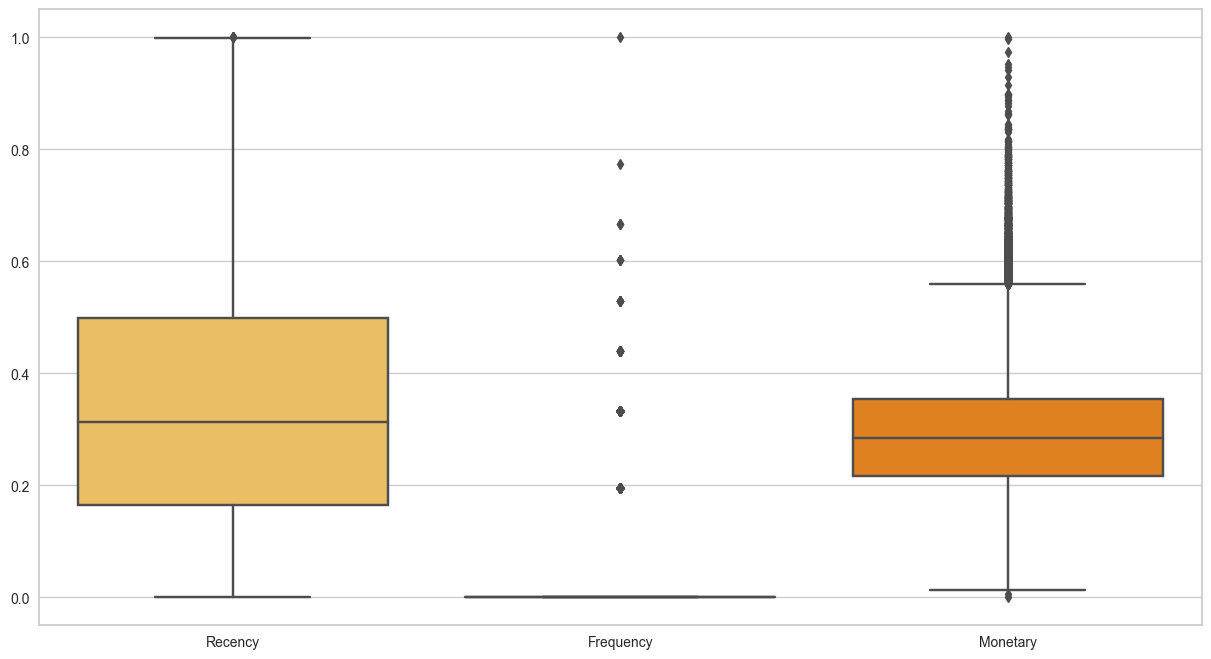

In [19]:
plt.figure(figsize = (15, 8))
my_pal = {"Recency": "#FFC64E", "Frequency": "#32AAD9", "Monetary":"#FF8001"}
sns.boxplot(data = scaled_rfm_df, palette=my_pal);

### K means

In [20]:
silhouettes = []
intertia_list = [ ]
for num_clusters in range (2,12) :
        print(f"n clusters: {num_clusters}")
        cls = KMeans(n_clusters = num_clusters, n_init='auto', init='k-means++')
        cls.fit(scaled_rfm_df)
        print(f"silhouette process...")
        silh = metrics.silhouette_score(scaled_rfm_df, cls.labels_, sample_size=15000)
        print(f"silhouette score : {silh}")
        silhouettes.append(silh)
        intertia_list.append(cls.inertia_)

n clusters: 2
silhouette process...
silhouette score : 0.46068659163682957
n clusters: 3
silhouette process...
silhouette score : 0.37461871904507715
n clusters: 4
silhouette process...
silhouette score : 0.3694869544160619
n clusters: 5
silhouette process...
silhouette score : 0.34275627230993877
n clusters: 6
silhouette process...
silhouette score : 0.3339585693448446
n clusters: 7
silhouette process...
silhouette score : 0.3183872997660072
n clusters: 8
silhouette process...
silhouette score : 0.304294104186133
n clusters: 9
silhouette process...
silhouette score : 0.32797088749479786
n clusters: 10
silhouette process...
silhouette score : 0.31405575473955
n clusters: 11
silhouette process...
silhouette score : 0.31997926310435204


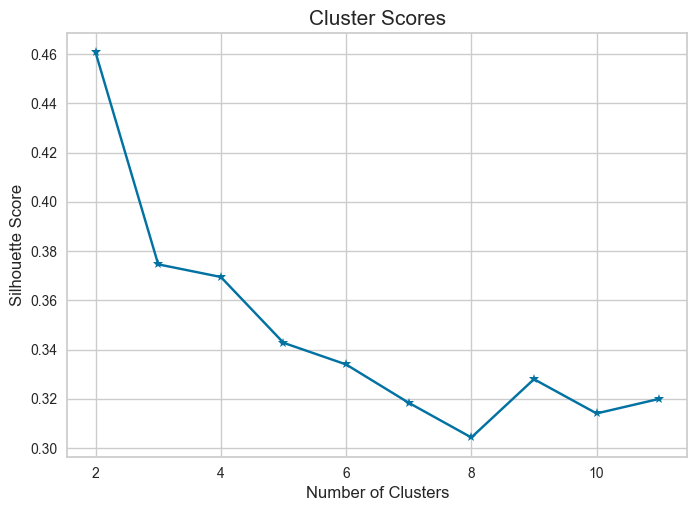

In [21]:
plt.plot(range(2,12), silhouettes, color = 'b', marker = '*')
plt.title('Cluster Scores', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 12)
plt.ylabel('Silhouette Score', fontsize = 12)
plt.show()

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

La valeur silhouette k=2 est un optimum local, les valeurs de silhouette pour k entre 3 et 4 semblent être de bons candidats. 

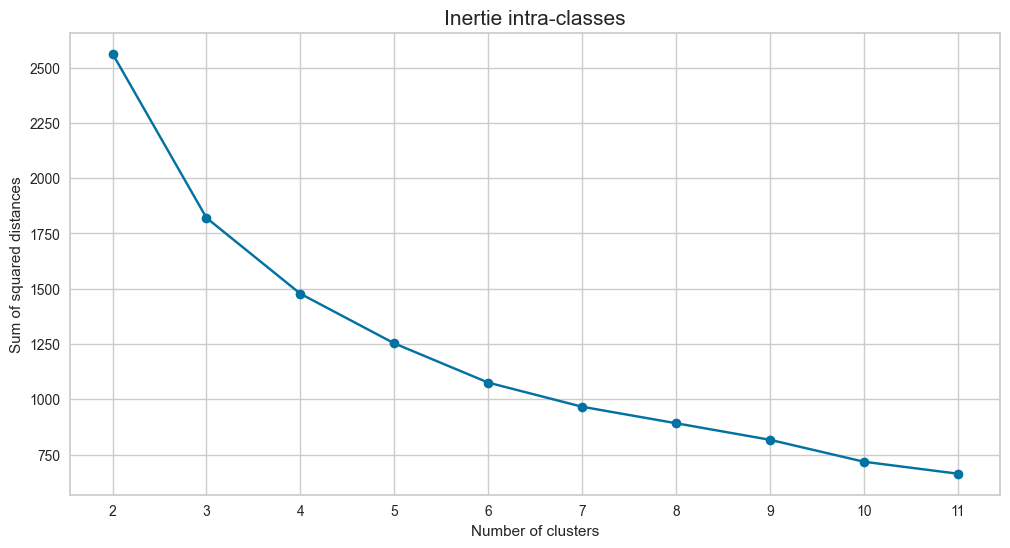

In [22]:
fig, ax = plt.subplots(1,1,figsize=(12,6))
plt.title('Inertie intra-classes', fontsize = 15)
ax.set_ylabel("Sum of squared distances")
ax.set_xlabel("Number of clusters")
ax.set_xticks(np.arange(0, 12, step=1))
ax = plt.plot(range(2,12), intertia_list, marker="o")

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

/Users/audreyhohmann/opt/miniconda3/envs/formOCR/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


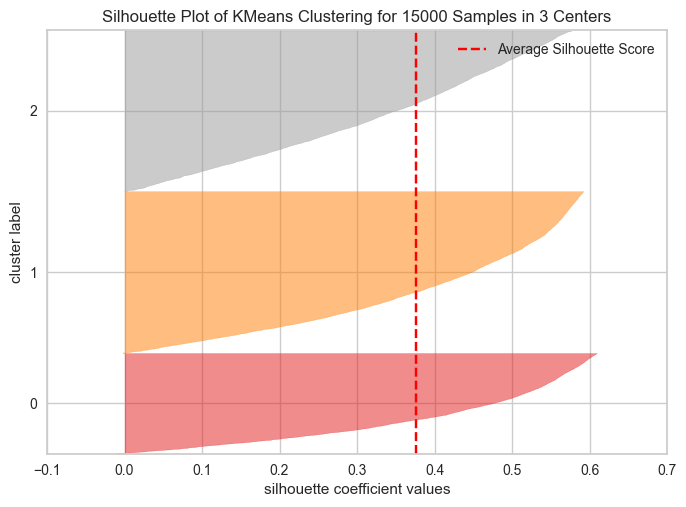

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 15000 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
model_3 = KMeans(n_clusters=3, init='k-means++')
visualizer = SilhouetteVisualizer(model_3)

visualizer.fit(scaled_rfm_df.sample(15000))    # Fit the data to the visualizer
visualizer.poof()

In [24]:
# la silhouette pour K=3 représente la meilleure répartition et le coefficient le plus élevé. 

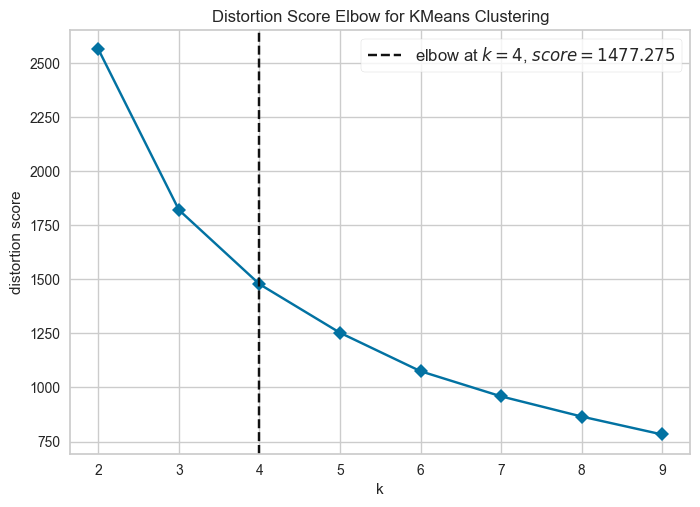

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, k=(2,10), timings=False)

visualizer.fit(scaled_rfm_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

Select the scoring metric to evaluate the clusters. The default is the mean distortion, defined by the sum of squared distances between each observation and its closest centroid. Other metrics include:

distortion: mean sum of squared distances to centers

silhouette: mean ratio of intra-cluster and nearest-cluster
distance

calinski_harabasz: ratio of within to between cluster dispersion

In [26]:
# Il n'est pas évident de voir où se situe le coude, probablement entre 3 et 5.

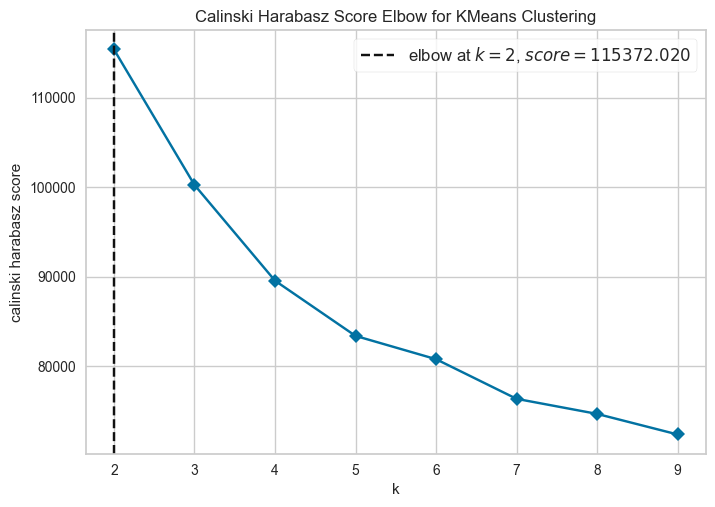

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [27]:
# Instantiate the clustering model and visualizer
model = KMeans(n_init='auto')
visualizer = KElbowVisualizer(model, metric='calinski_harabasz', k=(2,10), timings=False)

visualizer.fit(scaled_rfm_df)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [28]:
# Model fitting on optimised clusters

In [29]:
rfm_clusters = rfm.copy()

In [30]:
%%time
kmeans = KMeans(n_clusters = 3, n_init="auto").fit(scaled_rfm_df)
kmeans.predict(scaled_rfm_df)
labels = kmeans.labels_
centroid = kmeans.cluster_centers_
silh = metrics.silhouette_score(scaled_rfm_df, labels, sample_size=15000)
print(f"silhouette score : {silh}")

silhouette score : 0.37857338960017967
CPU times: user 5.01 s, sys: 1.97 s, total: 6.97 s
Wall time: 3.49 s


In [31]:
rfm_clusters['ClusterID']=labels
rfm_clusters.head()

,customer_unique_id,Recency,Frequency,Monetary,ClusterID
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,2
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,2


In [32]:
rfm_clusters.ClusterID.value_counts()

0    36257
2    35295
1    21804
Name: ClusterID, dtype: int64

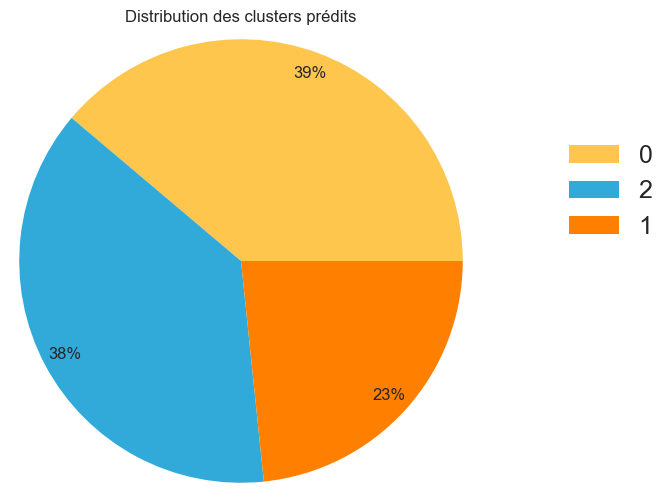

In [33]:
df1=rfm_clusters['ClusterID'].value_counts()
lab=df1.index.unique()
pie = df1.plot.pie(labels=None, figsize=(10,6), startangle=0, title="Distribution des clusters prédits",
                   autopct='%1.0f%%', pctdistance=0.9, radius=1.2, colors=["#FFC64E","#32AAD9", "#FF8001"], fontsize=12)
pie.legend(lab, loc='lower center', bbox_to_anchor=(0.8, 0.5, 1, 1), fontsize=18)
pie.axes.get_yaxis().set_visible(False)
plt.show()

In [34]:
agg_resume = rfm_clusters[["ClusterID", "Recency","Frequency","Monetary"]].groupby("ClusterID").agg(["mean","count","max"]).round()

In [35]:
print (agg_resume.sort_values([('ClusterID')],ascending=True))

          Recency             Frequency            Monetary                
             mean  count  max      mean  count max     mean  count      max
ClusterID                                                                  
0            87.0  36257  177       1.0  36257  15    220.0  36257  30186.0
1           458.0  21804  695       1.0  21804   6    204.0  21804  45256.0
2           255.0  35295  358       1.0  35295   9    208.0  35295  44048.0


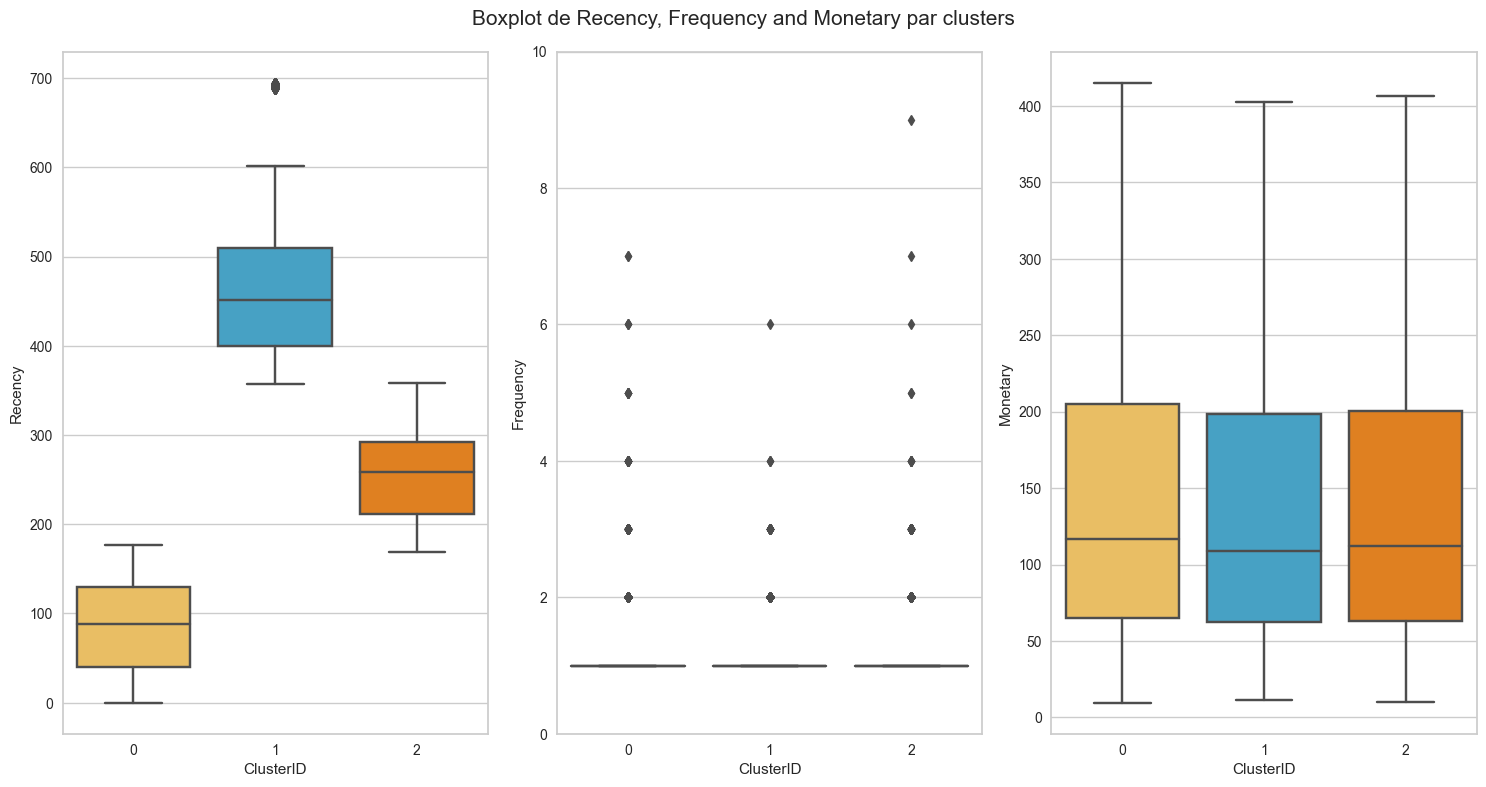

In [36]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 8))
my_pal3 = {0: "#FFC64E", 1: "#32AAD9", 2:"#FF8001"}
plt.suptitle('Boxplot de Recency, Frequency and Monetary par clusters', fontsize = 15)
sns.boxplot(rfm_clusters, x='ClusterID', y='Recency', palette= my_pal3, ax=ax[0])

sns.boxplot(rfm_clusters, x='ClusterID', y='Frequency', palette= my_pal3, ax=ax[1])
ax[1].set_ylim(0, 10)

sns.boxplot(rfm_clusters, x='ClusterID', y='Monetary', showfliers=False, palette= my_pal3, ax=ax[2])
plt.tight_layout(pad = 1)
plt.show()

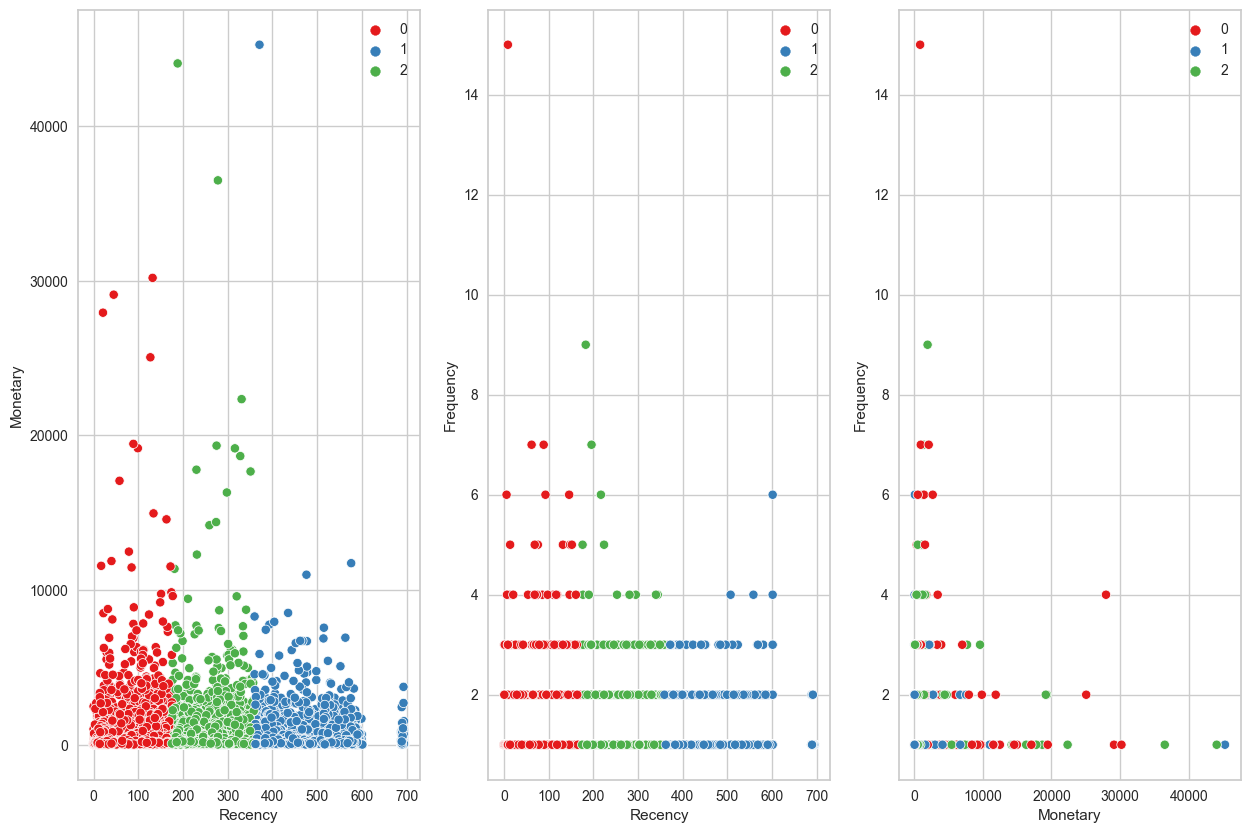

In [37]:
fig2, (axes) = plt.subplots(1,3,figsize=(15,10))


sns.scatterplot(data=rfm_clusters, x='Recency', y='Monetary',
                hue='ClusterID', ax=axes[0], palette='Set1', legend='full', s=45)
#axes[0].set_ylim(0,6000)

sns.scatterplot(data=rfm_clusters, x='Recency', y='Frequency',
                hue='ClusterID', palette='Set1', ax=axes[1], legend='full', s=45)

sns.scatterplot(data=rfm_clusters, x='Monetary', y='Frequency',
                hue='ClusterID', palette='Set1', ax=axes[2], legend='full', s=45)
#axes[2].set_xlim(0,6000)

axes[0].legend()
axes[1].legend()
axes[2].legend()


plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.setp(axes[2].get_legend().get_texts(), fontsize='10')

plt.show()

In [38]:
rfm_agg = rfm_clusters.groupby(['ClusterID']).agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean',
    'ClusterID': 'count'
}).round(3)

rfm_agg.rename(columns = {"Recency": "Avg. Recency",
                          "Frequency": "Avg. Frequency",
                          "Monetary": "Avg. Monetary",
                          "Cluster": "Customer Count"
                         }, inplace = True)

rfm_agg

,Avg. Recency,Avg. Frequency,Avg. Monetary,ClusterID
ClusterID,,,,
0,87.375,1.037,219.953,36257
1,457.913,1.026,204.020,21804
2,255.481,1.034,208.226,35295


In [39]:
#faire minmaxscaler
minmaxscaler = MinMaxScaler().set_output(transform="pandas")
mm_scaled_rfm_agg = minmaxscaler.fit_transform(rfm_agg)

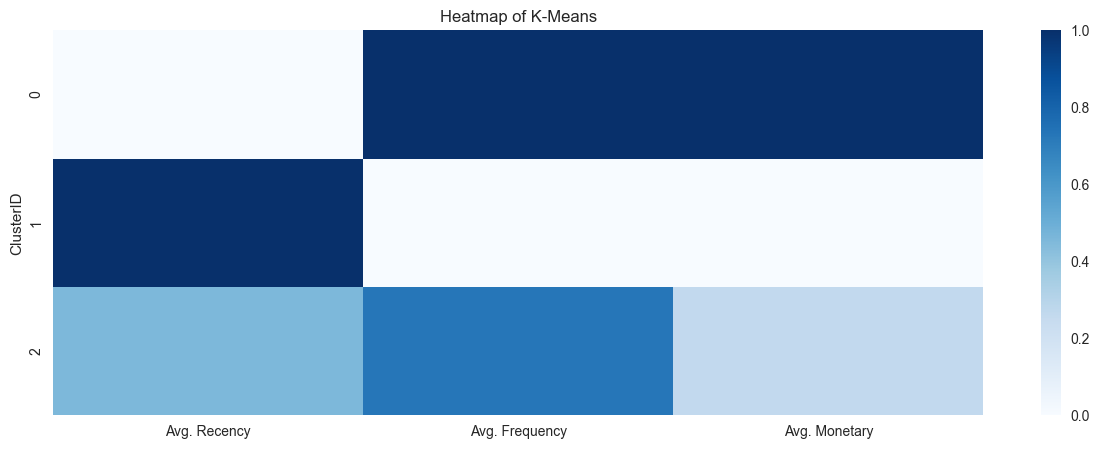

In [40]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(mm_scaled_rfm_agg.iloc[:, 0:3], fmt='.2f', cmap='Blues')
plt.title ("Heatmap of K-Means")
plt.show()

## Tests avec Ajout de la feature review_mean

In [41]:
df_mcommande = pd.read_csv('data_P5_mcommande.csv')

In [42]:
#moyenne des scores review par identifiant client unique
review_df = df_mcommande.groupby(['customer_unique_id'])['review_score'].mean().reset_index()

review_df.rename(columns = {"review_score": "review_mean"}, inplace = True)

review_df.head()

,customer_unique_id,review_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0
2,0000f46a3911fa3c0805444483337064,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,4.0
4,0004aac84e0df4da2b147fca70cf8255,5.0


In [43]:
rfm_review = rfm.merge(review_df, on='customer_unique_id', how='left')

In [44]:
rfm_review.head()

,customer_unique_id,Recency,Frequency,Monetary,review_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0


In [45]:
rfm_review.isna().sum()

customer_unique_id      0
Recency                 0
Frequency               0
Monetary                0
review_mean           603
dtype: int64

In [46]:
rfm_review = rfm_review.dropna(how='all',subset='review_mean')

In [47]:
rfm_review.shape

(92753, 5)

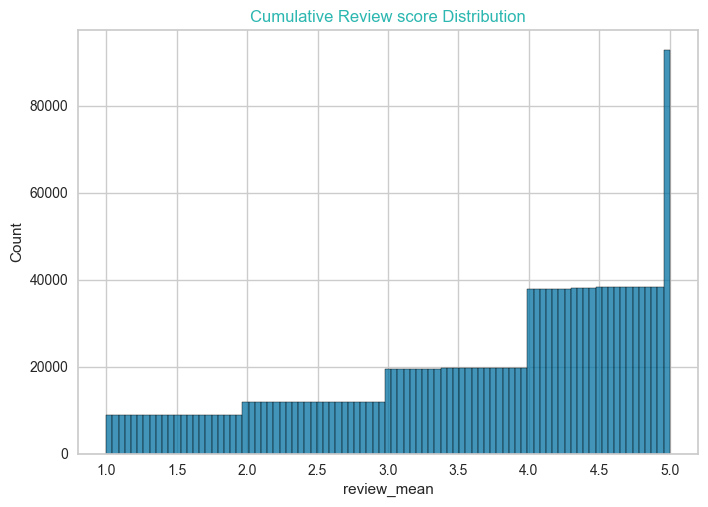

In [48]:
sns.histplot(rfm_review, x='review_mean', cumulative=True)
plt.title("Cumulative Review score Distribution", color='#2cb7b0')
plt.show()

In [49]:
rfm_transformed_m = rfm_transformed_m.join(rfm_review[['review_mean']], how='inner')

In [50]:
scaler = MinMaxScaler().set_output(transform="pandas")
scaled_rfm_df = scaler.fit_transform(rfm_transformed_m)
#scaled_rfm_df = pd.DataFrame(scaled_rfm, columns = rfm_review.columns[1:])

In [51]:
scaled_rfm_df.shape

(92753, 4)

In [52]:
scaled_rfm_df.max()

Recency          1.0
Frequency_log    1.0
Monetary_log     1.0
review_mean      1.0
dtype: float64

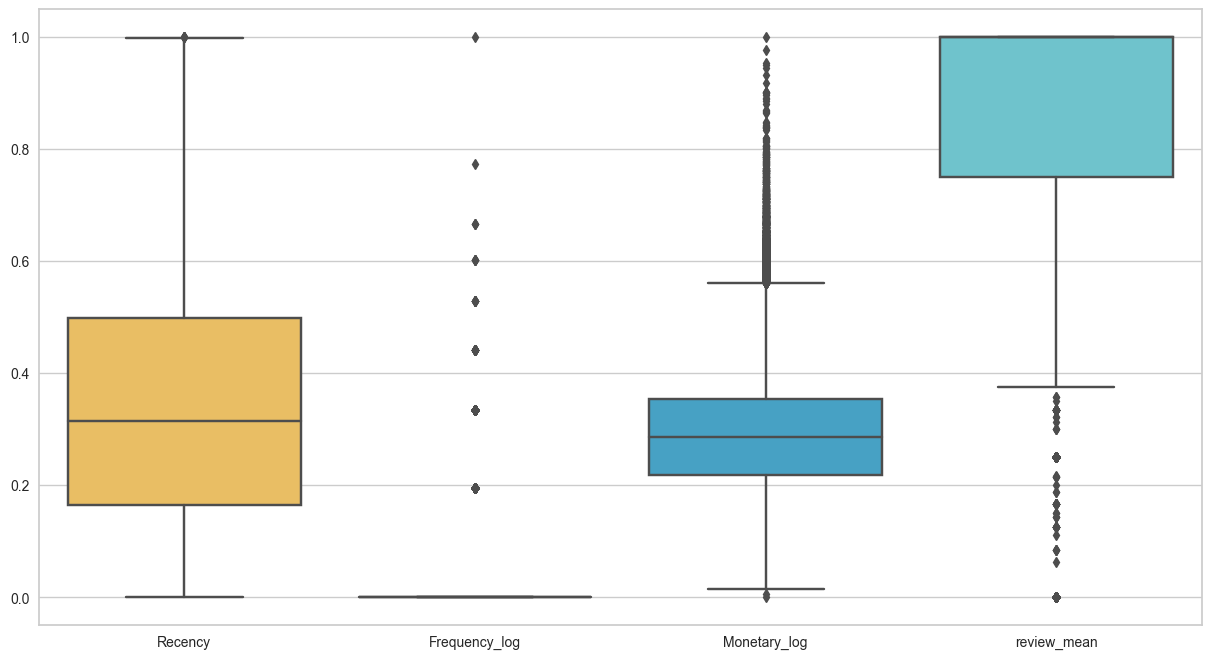

In [53]:
plt.figure(figsize = (15, 8))
my_pal4 = {"Recency": "#FFC64E", "Monetary_log": "#32AAD9", "Frequency_log":"#FF8001", "review_mean":"#5FD0DB"}
sns.boxplot(data = scaled_rfm_df, palette=my_pal4)
plt.show()

In [54]:
silhouettes = []
for num_clusters in range (2,10) :
        print(f"n clusters: {num_clusters}")
        cls = KMeans(n_clusters = num_clusters, n_init=1, init='k-means++', random_state=42)
        cls.fit(scaled_rfm_df)
        print(f"silhouette process...")
        silh = metrics.silhouette_score(scaled_rfm_df, cls.labels_, sample_size=10000)
        print(f"silhouette score : {silh}")
        silhouettes.append(silh)

n clusters: 2
silhouette process...
silhouette score : 0.5214393593742279
n clusters: 3
silhouette process...
silhouette score : 0.3363727204139571
n clusters: 4
silhouette process...
silhouette score : 0.3930874286674857
n clusters: 5
silhouette process...
silhouette score : 0.38830370261373576
n clusters: 6
silhouette process...
silhouette score : 0.3402198687679811
n clusters: 7
silhouette process...
silhouette score : 0.345164626456006
n clusters: 8
silhouette process...
silhouette score : 0.34509204678642663
n clusters: 9
silhouette process...
silhouette score : 0.33634775201537076


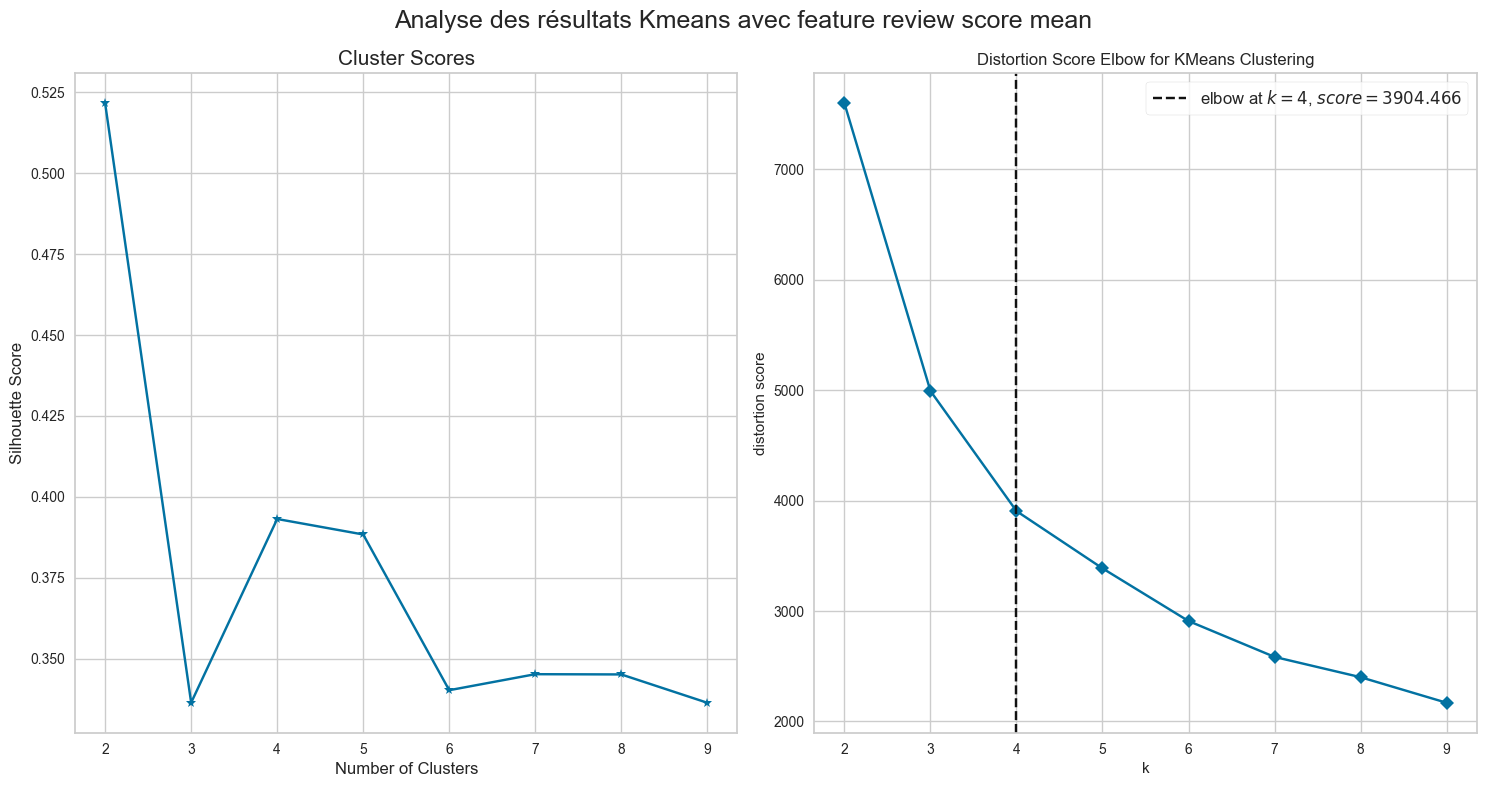

In [55]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize= (15, 8))
plt.suptitle('Analyse des résultats Kmeans avec feature review score mean', fontsize = 18)
ax[0].plot(range(2,10), silhouettes, color = 'b', marker = '*')
ax[0].set_title('Cluster Scores', fontsize = 15)
ax[0].set_xlabel('Number of Clusters', fontsize = 12)
ax[0].set_ylabel('Silhouette Score', fontsize = 12)



model = KMeans(n_init=5, random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), timings=False, ax=ax[1])
visualizer.fit(scaled_rfm_df)    # Fit the data to the visualizer
visualizer.finalize()
#visualizer2 = KElbowVisualizer(model, metric='calinski_harabasz', k=(2,15), timings=False, ax=ax[2])
#visualizer2.fit(scaled_rfm_df)    # Fit the data to the visualizer
#visualizer2.finalize() 

plt.tight_layout(pad = 1)
plt.show()

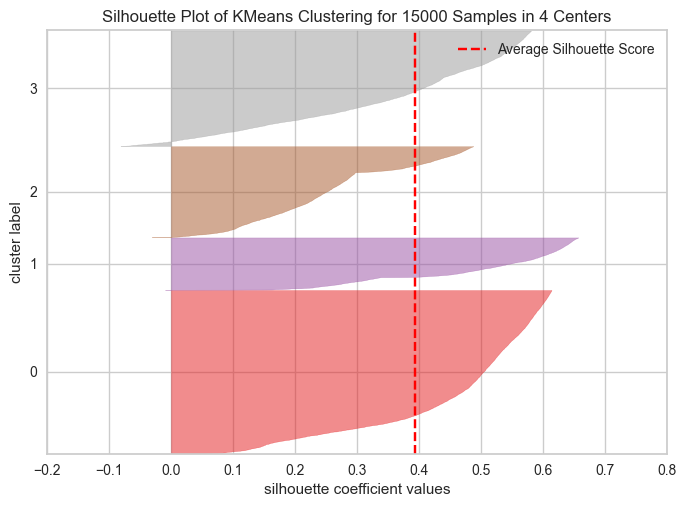

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 15000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [56]:
model_4 = KMeans(n_clusters=4, n_init=1, random_state=42)
visualizer3 = SilhouetteVisualizer(model_4)

visualizer3.fit(scaled_rfm_df.sample(15000))    # Fit the data to the visualizer
visualizer3.poof()

In [57]:
# Fit du modèle kmeans sur le nombre de clusters optimisés

In [58]:
%%time
kmeans = KMeans(n_clusters = 4, random_state=42, n_init="auto").fit(scaled_rfm_df)
kmeans.predict(scaled_rfm_df)
labels = kmeans.labels_
centroid = kmeans.cluster_centers_
silh = metrics.silhouette_score(scaled_rfm_df, labels, sample_size=15000)
print(f"silhouette score : {silh}")

silhouette score : 0.39307656043682326
CPU times: user 5.21 s, sys: 2.4 s, total: 7.61 s
Wall time: 4.46 s


In [59]:
rfm_review['ClusterID']=labels
rfm_review.head()

,customer_unique_id,Recency,Frequency,Monetary,review_mean,ClusterID
0,0000366f3b9a7992bf8c76cfdf3221e2,111,1,141.90,5.0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,114,1,27.19,4.0,2
2,0000f46a3911fa3c0805444483337064,537,1,86.22,3.0,3
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,43.62,4.0,2
4,0004aac84e0df4da2b147fca70cf8255,288,1,196.89,5.0,3


In [60]:
agg_resume = rfm_review[["ClusterID", "Recency","Frequency","Monetary", "review_mean"]].groupby("ClusterID").agg(["mean","count","max"]).round()

In [61]:
print (agg_resume.sort_values([('ClusterID')],ascending=True))

          Recency             Frequency            Monetary                  \
             mean  count  max      mean  count max     mean  count      max   
ClusterID                                                                     
0           140.0  35873  287       1.0  35873  15    191.0  35873  30186.0   
1           237.0  11839  695       1.0  11839   3    309.0  11839  44048.0   
2           177.0  19807  452       1.0  19807   9    207.0  19807  27935.0   
3           423.0  25234  695       1.0  25234   6    197.0  25234  11745.0   

          review_mean              
                 mean  count  max  
ClusterID                          
0                 5.0  35873  5.0  
1                 1.0  11839  3.0  
2                 4.0  19807  4.0  
3                 5.0  25234  5.0  


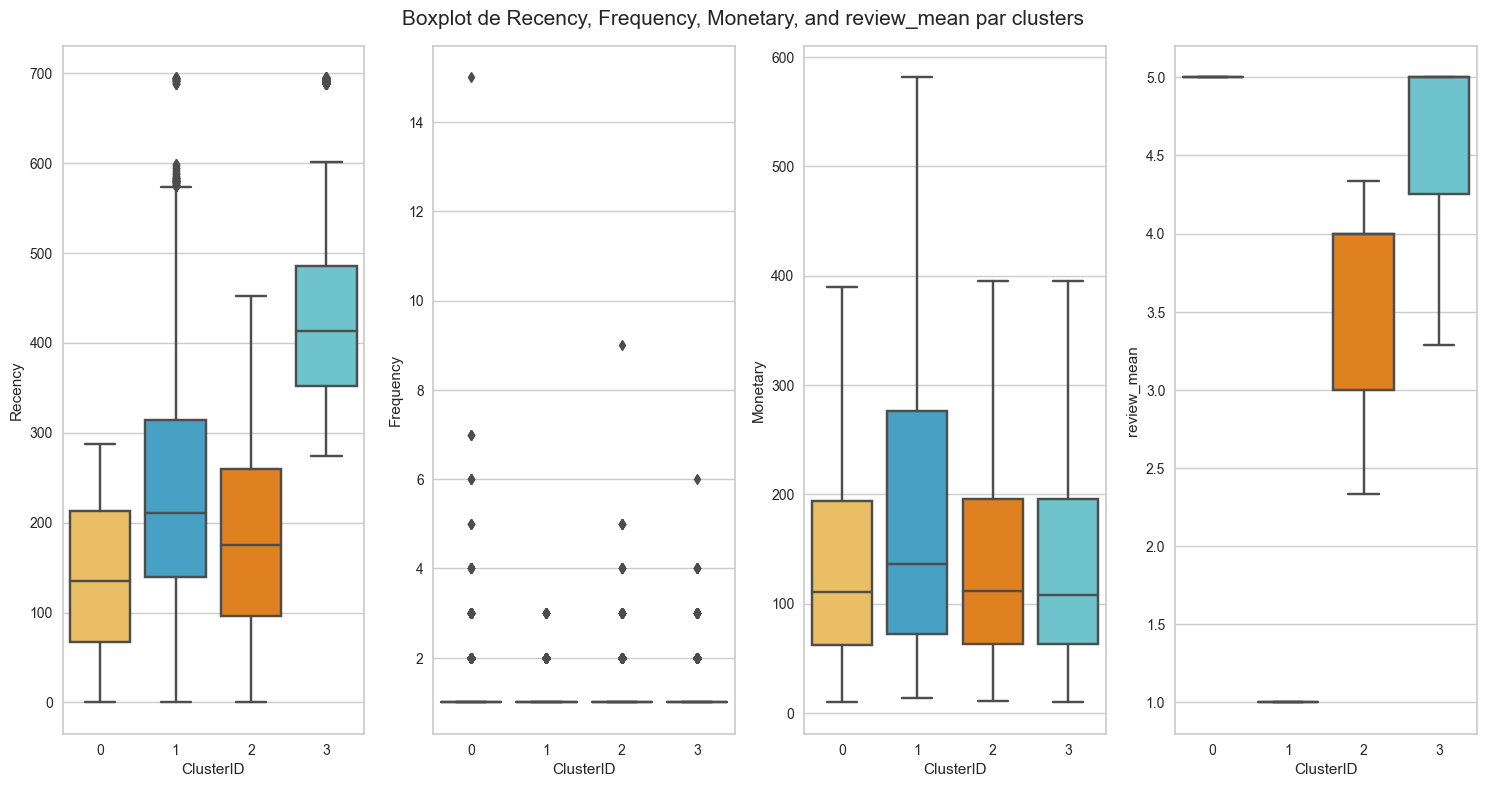

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize = (15, 8))
my_pal4 = {0: "#FFC64E", 1: "#32AAD9", 2:"#FF8001", 3:"#5FD0DB"}
plt.suptitle('Boxplot de Recency, Frequency, Monetary, and review_mean par clusters', fontsize = 15)
sns.boxplot(rfm_review, x='ClusterID', y='Recency', palette= my_pal4, ax=ax[0])

sns.boxplot(rfm_review, x='ClusterID', y='Frequency', palette= my_pal4, ax=ax[1])
#ax[1].set_ylim(0, 10)

sns.boxplot(rfm_review, x='ClusterID', y='Monetary', showfliers=False, palette= my_pal4, ax=ax[2])

sns.boxplot(rfm_review, x='ClusterID', y='review_mean', showfliers=False, palette= my_pal4, ax=ax[3])

plt.tight_layout(pad = 1)
plt.show()

In [63]:
rfm_agg = rfm_review.groupby(['ClusterID']).agg({
    'Recency': 'mean',
    'Frequency': 'mean', 
    'Monetary': 'mean',
    'review_mean': 'mean',
    'ClusterID': 'count'
}).round(3)

rfm_agg.rename(columns = {"Recency": "Avg. Recency",
                          "Frequency": "Avg. Frequency",
                          "Monetary": "Avg. Monetary",
                          "review_mean" : "Avg. Review_Score",
                          "Cluster": "Customer Count"
                         }, inplace = True)

rfm_agg

,Avg. Recency,Avg. Frequency,Avg. Monetary,Avg. Review_Score,ClusterID
ClusterID,,,,,
0,140.339,1.038,190.852,4.997,35873
1,236.714,1.024,308.960,1.248,11839
2,176.530,1.038,206.903,3.655,19807
3,423.148,1.028,196.839,4.709,25234


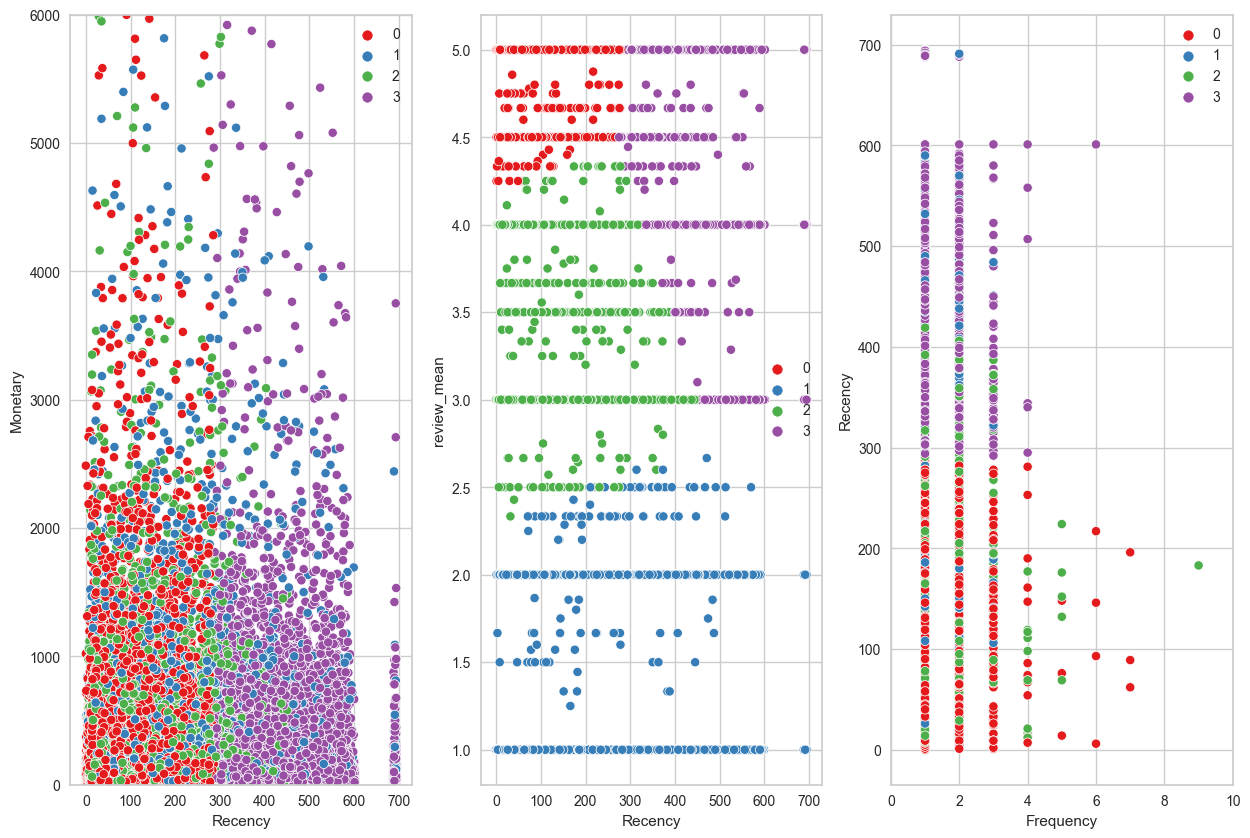

In [64]:
fig2, (axes) = plt.subplots(1,3,figsize=(15,10))


sns.scatterplot(data=rfm_review, x='Recency', y='Monetary',
                hue='ClusterID', ax=axes[0], palette='Set1', legend='full', s=45)
axes[0].set_ylim(0,6000)


sns.scatterplot(data=rfm_review, x='Recency', y='review_mean',
                hue='ClusterID', palette='Set1', ax=axes[1], legend='full', s=45)

sns.scatterplot(data=rfm_review, y='Recency', x='Frequency',
                hue='ClusterID', palette='Set1', ax=axes[2], legend='full', s=45)
axes[2].set_xlim(0,10)

axes[0].legend()
axes[1].legend()
axes[2].legend()


plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.setp(axes[2].get_legend().get_texts(), fontsize='10')

plt.show()

In [65]:
minmaxscaler = MinMaxScaler().set_output(transform="pandas")
mm_scaled_rfm_agg = minmaxscaler.fit_transform(rfm_agg)

In [66]:
mm_scaled_rfm_agg.head()

,Avg. Recency,Avg. Frequency,Avg. Monetary,Avg. Review_Score,ClusterID
ClusterID,,,,,
0,0.000000,1.000000,0.000000,1.000000,1.000000
1,0.340778,0.000000,1.000000,0.000000,0.000000
2,0.127970,1.000000,0.135901,0.642038,0.331530
3,1.000000,0.285714,0.050691,0.923180,0.557335


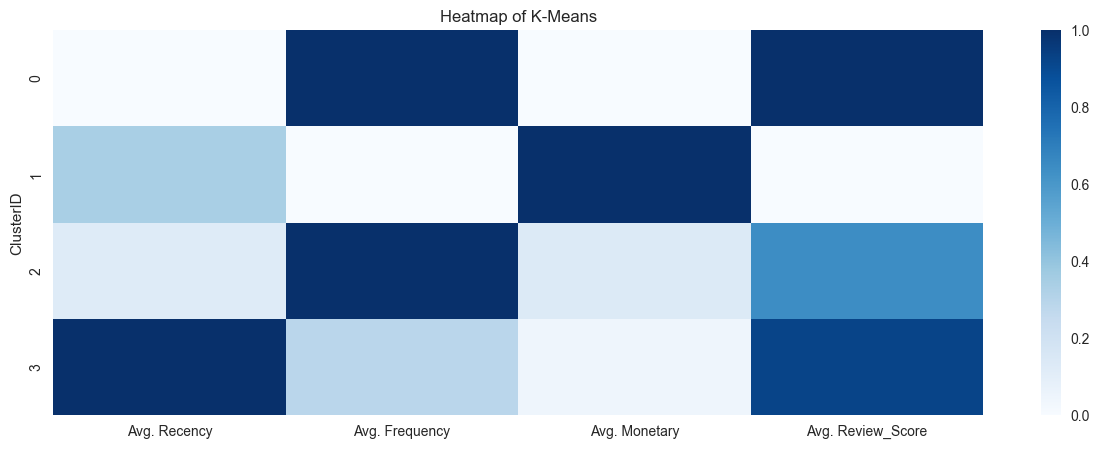

In [67]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(mm_scaled_rfm_agg.iloc[:, 0:4], fmt='.2f', cmap='Blues')
plt.title ("Heatmap of K-Means")
plt.show()

## Tests DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) finds core samples in regions of high density and expands clusters from them. This algorithm is good for data which contains clusters of similar density.

In [68]:
# Tests autres algorithmes pour comparaison résultats avec le k-means. 

In [69]:
# Echantillonnage du dataset

In [70]:
sample_X = scaled_rfm_df.sample(frac=0.3)

In [71]:
quantiles = scaled_rfm_df.quantile([.25, .5, .75, 0.99], axis = 0)

In [72]:
quantiles

,Recency,Frequency_log,Monetary_log,review_mean
0.25,0.164029,0.000000,0.217354,0.75
0.50,0.313669,0.000000,0.285214,1.00
0.75,0.497842,0.000000,0.354451,1.00
0.99,0.827338,0.194988,0.608057,1.00


In [73]:
quantiles['Frequency_log'].values[2:4]

array([0.       , 0.1949875])

In [74]:
test = scaled_rfm_df.groupby(pd.qcut(scaled_rfm_df.Monetary_log,quantiles['Monetary_log'].values, duplicates='drop')).sample(frac=0.2)

In [75]:
test.shape

(7249, 4)

In [76]:
C1 = scaled_rfm_df.groupby(pd.qcut(scaled_rfm_df.Recency,quantiles['Recency'].values, duplicates='drop')).sample(frac=0.12)
C2 = scaled_rfm_df.groupby(pd.qcut(scaled_rfm_df.Frequency_log,quantiles['Frequency_log'].values[2:4], duplicates='drop')).sample(frac=0.08)
C3 = scaled_rfm_df.groupby(pd.qcut(scaled_rfm_df.Monetary_log,quantiles['Monetary_log'].values, duplicates='drop')).sample(frac=0.2)
C4 = scaled_rfm_df.groupby(pd.qcut(scaled_rfm_df.review_mean,quantiles['review_mean'].values[0:2], duplicates='drop')).sample(frac=0.10)

In [77]:
sample_X_Q = pd.concat([C1, C2, C3, C4])

In [78]:
sample_X_Q.shape

(27300, 4)

In [79]:
sample_X_Q.head()

,Recency,Frequency_log,Monetary_log,review_mean
9325,0.129496,0.0,0.361295,0.75
69631,0.188489,0.0,0.065575,0.75
53971,0.149640,0.0,0.454699,1.00
6620,0.132374,0.0,0.405344,1.00
56183,0.198561,0.0,0.275828,1.00


In [80]:
len(sample_X_Q[sample_X_Q.index.duplicated(keep=False)])

5578

In [81]:
sample_X_Q = sample_X_Q[~sample_X_Q.index.duplicated(keep=False)]

In [82]:
sample_X_Q.shape

(21722, 4)

In [83]:
# choose hyperparameter
# https://stackoverflow.com/questions/15050389/estimating-choosing-optimal-hyperparameters-for-dbscan

In [84]:
from sklearn.neighbors import NearestNeighbors

In [85]:
def get_kdist_plot(X=None, k=None, radius_nbrs=1.0):

    nbrs = NearestNeighbors(n_neighbors=k, radius=radius_nbrs).fit(X)

    # For each point, compute distances to its k-nearest neighbors
    distances, indices = nbrs.kneighbors(X) 
                                       
    distances = np.sort(distances, axis=0)
    distances = distances[:, k-1]

    # Plot the sorted K-nearest neighbor distance for each point in the dataset
    plt.figure(figsize=(8,8))
    plt.plot(distances)
    plt.xlabel('Points/Objects in the dataset', fontsize=12)
    plt.ylabel('Sorted {}-nearest neighbor distance'.format(k), fontsize=12)
    plt.grid(True, linestyle="--", color='black', alpha=0.4)
    plt.show()
    plt.close()

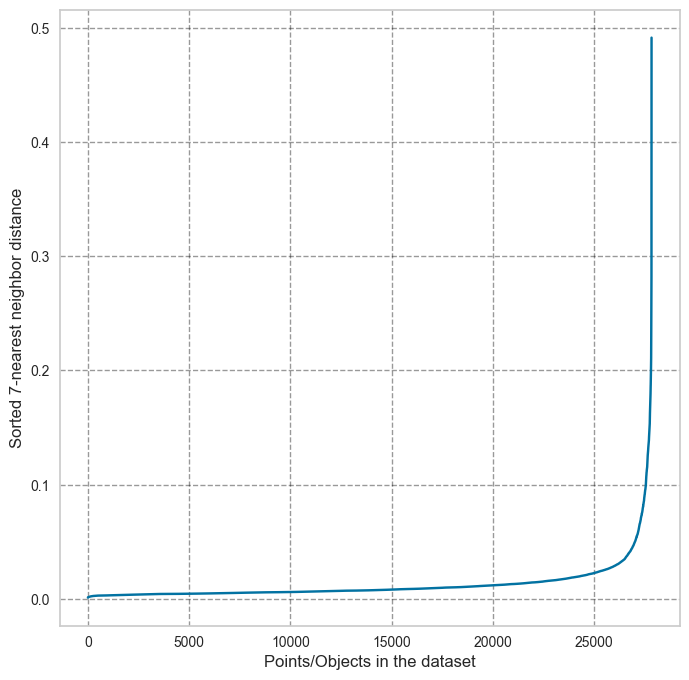

In [86]:
k = 2 * sample_X_Q.shape[-1] - 1 # k=2*{dim(dataset)} - 1
get_kdist_plot(X=sample_X, k=k)

In [87]:
range_eps = np.arange(0.06, 0.14, 0.02)
range_eps

array([0.06, 0.08, 0.1 , 0.12, 0.14])

In [88]:
for i in range_eps : 
    print ("eps value is "+str(i))
    db = DBSCAN(eps=i, min_samples=100).fit(sample_X_Q)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    print(set(labels))
    silhouette_avg = metrics.silhouette_score(sample_X_Q, labels)
    print ("For eps value = "+str(i), "The average silhouette_score is :", silhouette_avg)

eps value is 0.06
{0, 1, 2, 3, -1}
For eps value = 0.06 The average silhouette_score is : 0.22512971269520263
eps value is 0.08
{0, 1, 2, 3, 4, -1}
For eps value = 0.08 The average silhouette_score is : 0.24319450147448518
eps value is 0.1
{0, 1, 2, 3, 4, -1}
For eps value = 0.1 The average silhouette_score is : 0.26269745939428024
eps value is 0.12000000000000001
{0, 1, 2, 3, 4, -1}
For eps value = 0.12000000000000001 The average silhouette_score is : 0.27198948188809224
eps value is 0.14
{0, 1, 2, 3, -1}
For eps value = 0.14 The average silhouette_score is : 0.14207577693884754


In [89]:
min_samples = [10, 30, 50, 80, 100, 200] 

In [90]:
for i in min_samples : 
    print ("min_samples value is "+str(i))
    db = DBSCAN(eps = 0.12, min_samples=i).fit(sample_X_Q)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_]=True
    labels = db.labels_
    #on ignore les label '-1' qui sont pour les outliers
    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    print("For min_samples value ="+str(i), "Estimated number of clusters: %d" % n_clusters_, "Estimated number of noise points: %d" % n_noise_)
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(sample_X_Q, labels))

min_samples value is 10
For min_samples value =10 Estimated number of clusters: 11 Estimated number of noise points: 125
Silhouette Coefficient: 0.118
min_samples value is 30
For min_samples value =30 Estimated number of clusters: 6 Estimated number of noise points: 270
Silhouette Coefficient: 0.218
min_samples value is 50
For min_samples value =50 Estimated number of clusters: 6 Estimated number of noise points: 308
Silhouette Coefficient: 0.207
min_samples value is 80
For min_samples value =80 Estimated number of clusters: 6 Estimated number of noise points: 468
Silhouette Coefficient: 0.167
min_samples value is 100
For min_samples value =100 Estimated number of clusters: 5 Estimated number of noise points: 653
Silhouette Coefficient: 0.272
min_samples value is 200
For min_samples value =200 Estimated number of clusters: 4 Estimated number of noise points: 1405
Silhouette Coefficient: 0.273


In [91]:
%%time
# Compute DBSCAN
db = DBSCAN(eps=0.12, min_samples=100).fit(sample_X_Q)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_]=True
labels = db.labels_
            
print(set(labels))
#on ignore les label '-1' qui sont pour les outliers
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
silh = metrics.silhouette_score(sample_X_Q, labels)
print(f"silhouette score : {silh}")

print("Estimated number of clusters: %d" % n_clusters_, "Estimated number of noise points: %d" % n_noise_)

{0, 1, 2, 3, 4, -1}
silhouette score : 0.27198948188809224
Estimated number of clusters: 5 Estimated number of noise points: 653
CPU times: user 10.3 s, sys: 4.18 s, total: 14.5 s
Wall time: 9.32 s


In [92]:
sample_X_df = sample_X_Q.copy()

In [93]:
sample_X_df['ClusterID_db']=labels
sample_X_df.head()

,Recency,Frequency_log,Monetary_log,review_mean,ClusterID_db
9325,0.129496,0.0,0.361295,0.75,0
69631,0.188489,0.0,0.065575,0.75,0
53971,0.149640,0.0,0.454699,1.00,1
6620,0.132374,0.0,0.405344,1.00,1
56183,0.198561,0.0,0.275828,1.00,1


In [94]:
rfm_agg = sample_X_df.groupby(['ClusterID_db']).agg({
    'Recency': 'mean',
    'Frequency_log': 'mean', 
    'Monetary_log': 'mean',
    'review_mean': 'mean',
    'ClusterID_db': 'count'
}).round(3)

rfm_agg.rename(columns = {"Recency": "Avg. mm_Recency",
                          "Frequency_log": "Avg. mm_Frequency_log",
                          "Monetary_log": "Avg. mm_Monetary_log",
                          "review_mean" : "Avg. mm_Review_Score",
                          "ClusterID_db": "Customer Count"
                         }, inplace = True)

rfm_agg

,Avg. mm_Recency,Avg. mm_Frequency_log,Avg. mm_Monetary_log,Avg. mm_Review_Score,Customer Count
ClusterID_db,,,,,
-1,0.422,0.132,0.402,0.68,653
0,0.337,0.000,0.278,0.75,3622
1,0.333,0.000,0.283,1.00,13761
2,0.343,0.000,0.279,0.50,1510
3,0.321,0.000,0.302,0.00,1704
4,0.298,0.000,0.282,0.25,472


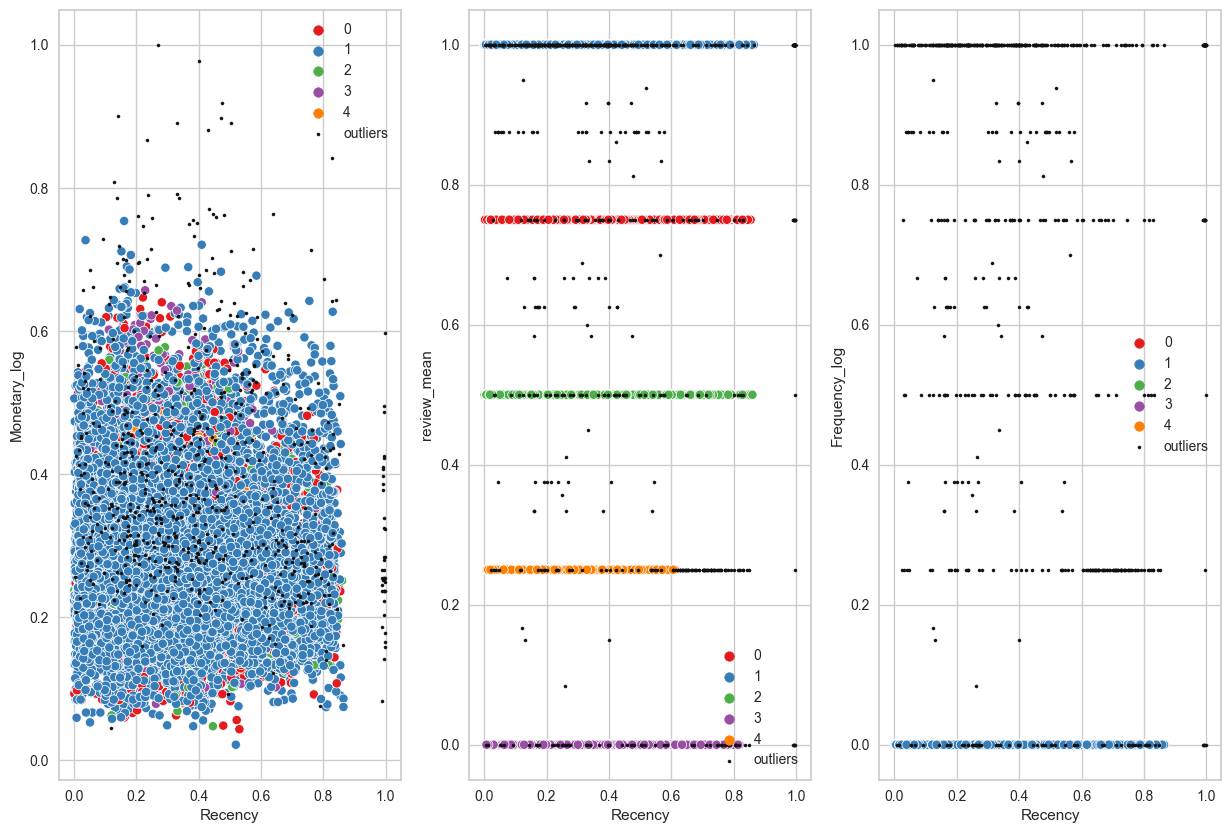

In [95]:
outliers = sample_X_df[sample_X_df['ClusterID_db']==-1]
data = sample_X_df[sample_X_df['ClusterID_db']!=-1]

fig2, (axes) = plt.subplots(1,3,figsize=(15,10))


sns.scatterplot(data=data, x='Recency', y='Monetary_log',
                hue='ClusterID_db', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(data=data, x='Recency', y='review_mean',
                hue='ClusterID_db', palette='Set1', ax=axes[1], legend='full', s=45)

sns.scatterplot(data=data, x='Recency', y='Frequency_log',
                hue='ClusterID_db', palette='Set1', ax=axes[2], legend='full', s=45)

axes[0].scatter(outliers['Recency'], outliers['Monetary_log'], s=5, label='outliers', c="k")
axes[1].scatter(outliers['Recency'], outliers['review_mean'], s=5, label='outliers', c="k")
axes[2].scatter(outliers['Recency'], outliers['review_mean'], s=5, label='outliers', c="k")
axes[0].legend()
axes[1].legend()
axes[2].legend()


plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.setp(axes[2].get_legend().get_texts(), fontsize='10')

plt.show()

The graph above shows that there are some outliers - these points do not meet distance and minimum samples requirements to be recognised as a cluster.

## Tests agglomerative clustering

https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

In [96]:
import scipy.cluster.hierarchy as sch

In [97]:
sample_X_Q.head()

,Recency,Frequency_log,Monetary_log,review_mean
9325,0.129496,0.0,0.361295,0.75
69631,0.188489,0.0,0.065575,0.75
53971,0.149640,0.0,0.454699,1.00
6620,0.132374,0.0,0.405344,1.00
56183,0.198561,0.0,0.275828,1.00


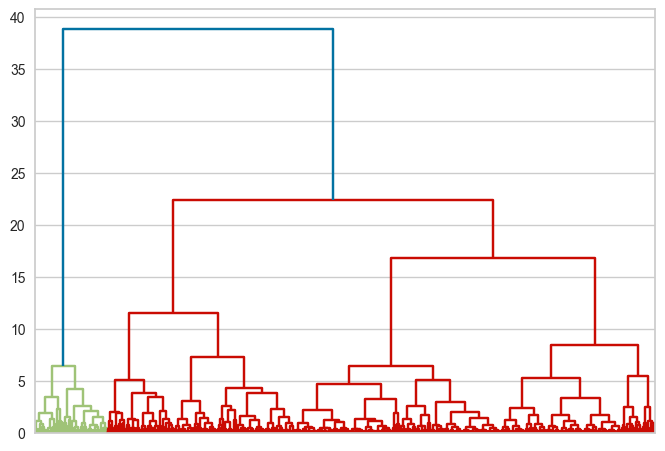

In [98]:
dendrogram = sch.dendrogram(sch.linkage(sample_X_Q.iloc[0:10000], method='ward'), p=30, truncate_mode='level', no_labels=True)

In [99]:
%%time
aggc = AgglomerativeClustering(n_clusters=4, linkage='ward')
aggc.fit(sample_X_Q)

aggc_labels = aggc.labels_

CPU times: user 17.9 s, sys: 2.8 s, total: 20.7 s
Wall time: 21.5 s


In [100]:
print(set(aggc_labels))

{0, 1, 2, 3}


In [101]:
print(aggc.n_clusters_)

4


In [102]:
 print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(sample_X_Q, aggc_labels))

Silhouette Coefficient: 0.377


In [103]:
sample_X_df['ClusterID_CAH']=aggc_labels
sample_X_df.head()

,Recency,Frequency_log,Monetary_log,review_mean,ClusterID_db,ClusterID_CAH
9325,0.129496,0.0,0.361295,0.75,0,0
69631,0.188489,0.0,0.065575,0.75,0,0
53971,0.149640,0.0,0.454699,1.00,1,0
6620,0.132374,0.0,0.405344,1.00,1,0
56183,0.198561,0.0,0.275828,1.00,1,0


In [104]:
rfm_agg = sample_X_df.groupby(['ClusterID_CAH']).agg({
    'Recency': 'mean',
    'Frequency_log': 'mean', 
    'Monetary_log': 'mean',
    'review_mean': 'mean',
    'ClusterID_CAH': 'count'
}).round(3)

rfm_agg.rename(columns = {"Recency": "Avg. mm_Recency",
                          "Frequency_log": "Avg. mm_Frequency_log",
                          "Monetary_log": "Avg. mm_Monetary_log",
                          "review_mean" : "Avg. mm_Review_Score",
                          "ClusterID_CAH": "Customer Count"
                         }, inplace = True)

rfm_agg

,Avg. mm_Recency,Avg. mm_Frequency_log,Avg. mm_Monetary_log,Avg. mm_Review_Score,Customer Count
ClusterID_CAH,,,,,
0,0.219,0.005,0.282,0.969,11633
1,0.349,0.002,0.312,0.022,1944
2,0.396,0.005,0.285,0.609,4253
3,0.610,0.002,0.293,0.999,3892


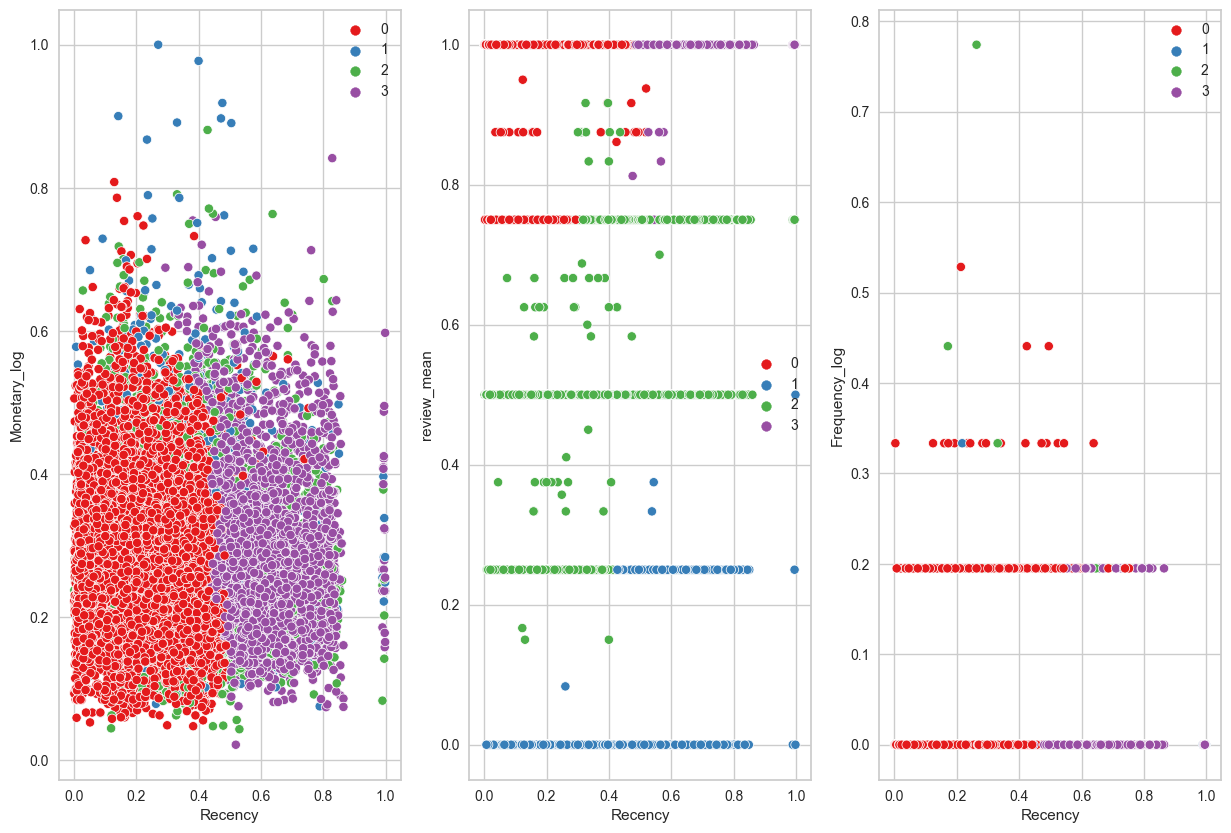

In [105]:
data = sample_X_df

fig2, (axes) = plt.subplots(1,3,figsize=(15,10))


sns.scatterplot(data=data, x='Recency', y='Monetary_log',
                hue='ClusterID_CAH', ax=axes[0], palette='Set1', legend='full', s=45)

sns.scatterplot(data=data, x='Recency', y='review_mean',
                hue='ClusterID_CAH', palette='Set1', ax=axes[1], legend='full', s=45)

sns.scatterplot(data=data, x='Recency', y='Frequency_log',
                hue='ClusterID_CAH', palette='Set1', ax=axes[2], legend='full', s=45)

axes[0].legend()
axes[1].legend()
axes[2].legend()


plt.setp(axes[0].get_legend().get_texts(), fontsize='10')
plt.setp(axes[1].get_legend().get_texts(), fontsize='10')
plt.setp(axes[2].get_legend().get_texts(), fontsize='10')

plt.show()